In [4]:
from sklearn.datasets import fetch_olivetti_faces


import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA



In [5]:


def plot(images,nums,n):

    fig, axs = plt.subplots(n,n)
    
    plt.suptitle('Some faces examples')
    plt.axis('off')
    count=0
    for i in range(0,n):
        for j in range(0,n):
            axs[i,j].imshow(images[nums[count]]*-1,cmap='Greys')
            count+=1
           
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
    fig.tight_layout(pad=1.0)
    fig.set_figwidth(10)
    fig.set_figheight(8)
    plt.show()



In [6]:


faces = fetch_olivetti_faces()
train= faces['data']



downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/robert/scikit_learn_data


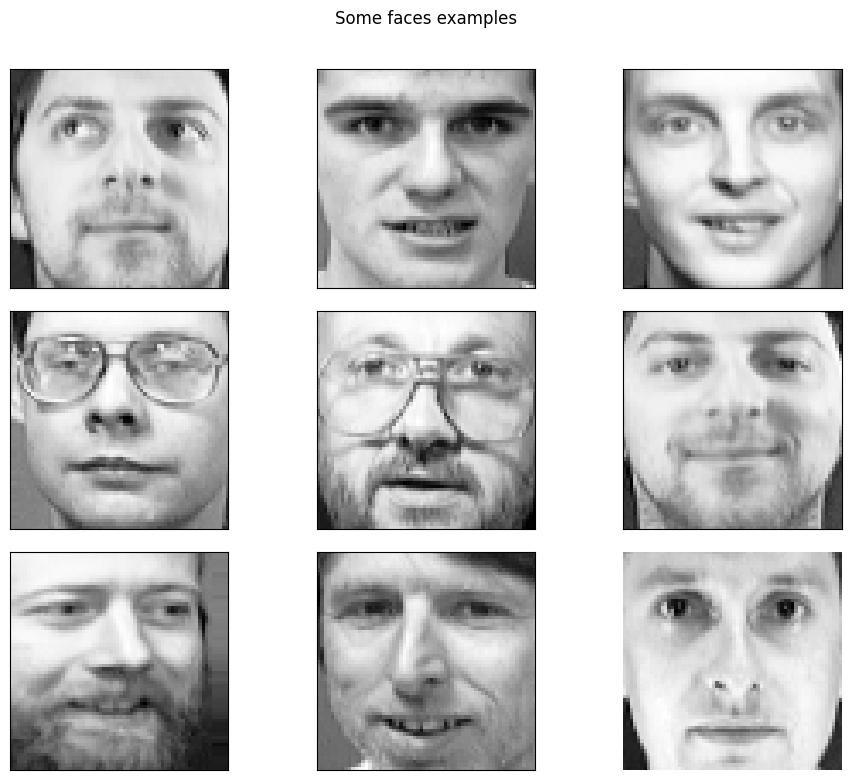

In [8]:
import random 
from random import seed

seed(1)
plot(faces['images'],random.sample(range(len(faces['images'])), 9),3)



## Calculating eigenfaces with principal component analysis

In [ ]:


n_components = 90
def learn_eigenfaces(train,n_components):
    decomposition= PCA(n_components,whiten=True)
    decomposition.fit(train)
    base= decomposition.components_
    eigenfaces= np.reshape(base,(n_components,64,64))
    print('Successful learning')
    return base, eigenfaces ,coefs



In [10]:
base, eigenfaces = learn_eigenfaces(train, n_components)

Successful learning


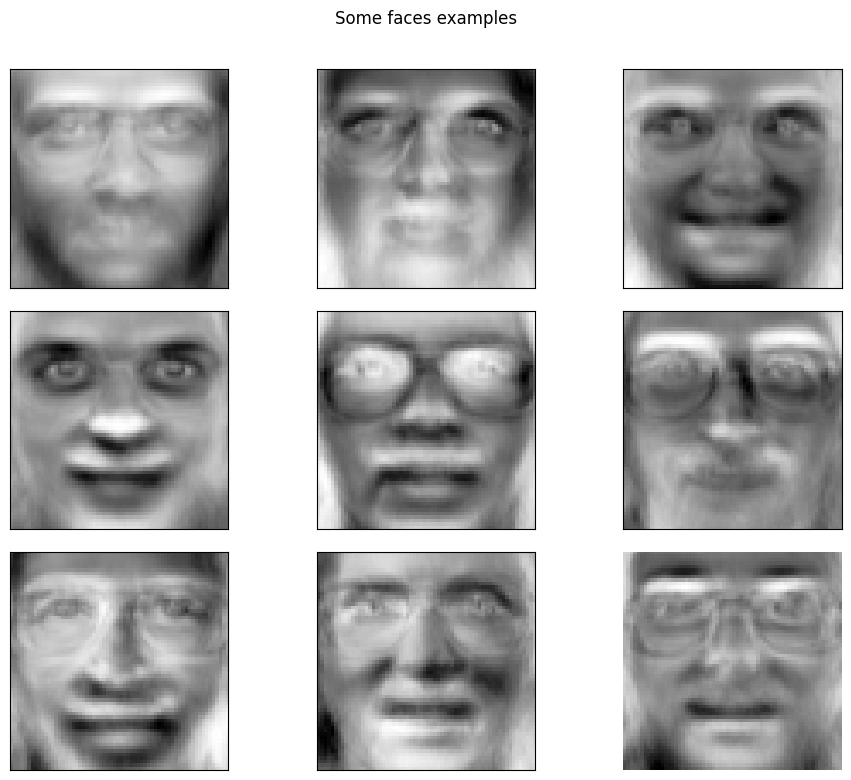

In [11]:
plot(eigenfaces[2:29],list(range(0,9)),3)

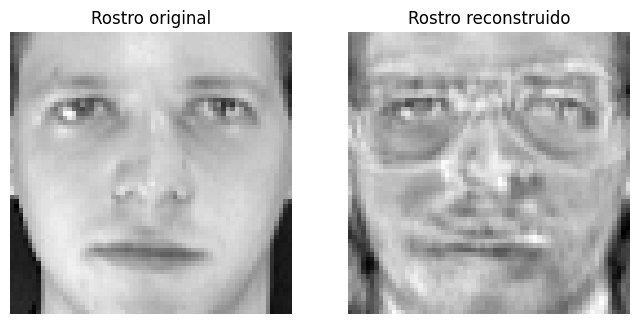

In [13]:
# Tomar el primer rostro como ejemplo
rostro = train[0]

# Proyectar el rostro sobre las componentes principales (eigenfaces)
# para obtener los coeficientes de combinación lineal
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components, whiten=True)
pca.fit(train)
coefs = pca.transform([rostro])[0]

# Reconstruir el rostro usando la combinación lineal de eigenfaces (más la media)
rostro_reconstruido = np.dot(coefs, base) + pca.mean_

# Mostrar el rostro original y el reconstruido para comparación
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(rostro.reshape(64, 64), cmap='gray')
axes[0].set_title('Rostro original')
axes[0].axis('off')

axes[1].imshow(rostro_reconstruido.reshape(64, 64), cmap='gray')
axes[1].set_title('Rostro reconstruido')
axes[1].axis('off')

plt.show()